In [1]:
# pandas, numpy, pyplot 라이브러리 가져오기
import pandas as pd # 데이터타입, 데이터처리
import numpy as np # 수학연산, 숫자데이터 생성
import matplotlib.pyplot as plt # 시각화

#### < 데이터셋 개요>
- Survived: 생존 여부 
    - 0 = No
    - 1 = Yes
- pclass: 티켓 등급 
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Name : 이름, 사회적등급
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구 
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

#### 데이터 적재

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 컬럼을 소문자로 만들어주세요.

#### .rename을 활용
data.rename(columns=str.lower)

#### data.columns = data.columns.str.lower()
data.columns = data.columns.str.lower()

#### .map 활용
data.columns = data.columns.map(str.lower)

In [4]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측치 확인
- 컬럼별 갯수
- 데이터셋의 크기가 작은 경우는 결측치가 있는 레코드를 삭제하지 않는다.
    - 대체하는 방식으로 전처리

In [5]:
data.shape

(891, 12)

In [7]:
# data.isnull()은 값이 있으면 False, 없으면 True를 셀에 배치하는데
# 파이썬 특성상 True는 1로 간주하고 False는 0으로 간주하므로
# isnull()에 대해 총합을 구하면, 결측치 개수를 구할 수 있습니다.
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [10]:
# 전체 데이터 대비 결측치의 비중
# 결측치 / 891(전체 데이터 개수) * 100 = 비율
data.isnull().sum() / 891 * 100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

#### 불필요한 변수 제거

- ticket

In [13]:
# ticket 컬럼 누락시키기

### .drop(axis=1, inplace=True)
data.drop('ticket', axis=1, inplace=True)

#del data['ticket']

In [14]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [18]:
# 누락 확인
'ticket' in data.columns

False

In [20]:
# ticket 컬럼을 누락시킨 csv 파일을 외부로 빼내기
# ticket_deleted_titanic.csv
# 단, 그냥 to_csv를 할 경우는 자동으로 csv에 로우명을 매겨주기 때문에
# 추후 다시 import할때 Unnamed :0 컬럼이 들어옵니다.
# 이를 방지하기 위해 index=False를 줄 수 있습니다.
data.to_csv('ticket_deleted_titanic.csv', index=False)

#### Cabin 데이터를 활용하여 유도변수 생성

- 개별 객실 번호는 의미가 없음(123, 456 ...)
- cabin 데이터의 첫 글자가 deck(구역)을 의미
- 유도변수 : deck컬럼 추가
- deck 컬럼에 추가될 자료 : A, B, C, D, E, F, G, T, unknown

- cabin 컬럼의 각 값에 적용할 처리
    - 1)
        - 값의 첫 번째 문자가 deck list에 있으면 해당 deck을 반환
        - 없으면(NaN) deck list의 unknown 반환
    - 2)
        - 첫 번째 문자 반환
        - 없으면 다른 것 반환

In [ ]:
# NaN
# 1. type = float
# 2. 다른 값으로 대체해서 처리
# 3. str으로 변경

In [ ]:
deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
sample = ['C123', np.nan, 'D201', np.nan, 'F999']
# result = ['C', 'unknown', 'D', 'unknown', 'F']

In [22]:
type(np.NaN)

float

In [26]:
# 함수를 정의해서, apply나 map을 통해 유도변수로 교체해주세요.
def cabin_to_deck(value):
    deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
    # NaN인지 검사
    if type(value)==type(np.nan):
        return 'unknown'
    # NaN가 아니면 덱 종류만 리턴
    elif value[0] in deck_list:
    # 덱 리스트에 분류된 덱이 맞는지 체크
        return value[0]
    else:
        return 'unknown'

In [27]:
# 컬럼명은 'deck' 으로 해 주세요.
data['deck'] = data['cabin'].map(cabin_to_deck)

In [28]:
data['deck']

0      unknown
1            C
2      unknown
3            C
4      unknown
        ...   
886    unknown
887          B
888    unknown
889          C
890    unknown
Name: deck, Length: 891, dtype: object

#### Name 데이터를 활용하여 유도변수 생성

- 개별 이름은 모델 예측에 유의미한 변수가 아니다.
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다.
- Mr, Ms, Miss, Master ...
- 추출 하여 title 컬럼으로 추가
- 첫번째 방법. split() 두번 사용하여 처리
- 두번째 방법. 정규식을 사용하여 처리
    - ver1
        - 정규식 패턴 생성에 사용할 문자열 : Sir, Mr, Don, Major, Capt, Jonkheer, Rev, Col, Dr, Mrs, Countess, Dona, Mme, Ms, Miss, Mlle, Master
        - 정규식 사용 순서 : 원본 문자열에서 split 결과의 1번 인덱스 값
    - ver2
        - 정규식 패턴 : [a-zA-Z]+\.

In [33]:
# split을 활용해서, name컬럼의 값들을 칭호만 남겨서 저장해주세요.
# 새로운 컬럼인 splited_name 컬럼에 저장해주시면 됩니다.
def name_split(value):
    return value.split(", ")[1].split(".")[0]

In [34]:
data['splited_name'] = data['name'].apply(name_split)

In [36]:
data['splited_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
# 정규표현식 사용을 위해 import re 실행
# regular expression(정규 표현식)
import re

In [68]:
# 정규표현식은 re.compile('내부 패턴', re.I)를 이용하면 해당 단어만 뽑아줍니다.
# 이를 위해서 반드시 먼저 import re 가 실행되어 있어야 합니다.
# 단어 리스트를 가지고 정규식 패턴 적용
def get_title(name):
    # 둘 이상의 단어를 타겟으로 잡을때는 |(쉬프트 + 역슬래시)를 사용합니다.
    pattern = re.compile('Sir|Mrs|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mr|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.I)
    # 정규식변수.search(타겟) => 타겟에서 패턴에 해당하는 자료가 있는지 조사
    result = pattern.search(name)
    if result:
        return result.group().lower()
    else:
        str(np.nan)

In [65]:
get_title("the Capt, man")

Capt


'capt'

In [70]:
# 위 정규식 실행 함수를 name에 적용하면 호칭만 뽑혀나옴
data['title'] = data['name'].apply(get_title)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,mr


In [81]:
# re를 사용하지 않는 경우는 팬더스에서 .str.extract('패턴')를 사용한다. 
# expand=False를 주지 않으면 DataFrame형으로 나옴
data['name'].str.extract('([a-zA-Z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [82]:
# 호칭별 개수
data['title'].value_counts()

mr          493
miss        177
mrs         123
master       39
dr           16
col          12
ms            8
rev           6
don           4
mme           4
sir           2
major         2
mlle          2
capt          1
countess      1
jonkheer      1
Name: title, dtype: int64

#### Name 데이터를 활용하여 생성한 유도변수 처리

* 범주 재설정

    capt - Officer
    
    col - Officer
    
    major - Officer
    
    dr - Officer
    
    jonkheer - Royalty
    
    rev - Officer
    
    countess - Royalty
    
    dona - Royalty
    
    lady - Royalty
    
    don - Royalty
    
    sir - Officer
    
    mr - Mr
    
    mme - Mrs
    
    ms - Mrs
    
    mrs - Mrs
    
    miss - Miss
    
    mlle - Miss
    
    master - Master
    
    nan - Mr(최빈값)

In [83]:
title_map = {
    "capt":"Officer", 
    "col":"Officer", 
    "major":"Officer", 
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    'sir' : 'Officer',
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"
}

In [84]:
# data['title'] 에 들어있던 요소를 위의 규칙을 따라서 내부요소 변경해주기
data['title'] = data['title'].map(title_map)
data['title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: title, Length: 891, dtype: object

#### 결측치 처리 - Age

- 미성년(Master, Miss)
- title 별 평균으로 age 결측치 대체
- transform
- (참고)사용자정의함수 : 매개변수 3개(타이틀별평균, 데이터, 타이틀리스트)

In [85]:
# age 컬럼 중 null이 들어온 컬럼 개수를 구해주세요
data.age.isnull().sum()

177

In [ ]:
# df['col'].transform(mean)
# df['col'].mean()
# df['col'].apply(lambda x : mean(x))
# df['col'].apply(함수)

In [86]:
# title 별 age의 평균값
# 그룹바이를 이용해 'title' 컬럼값별 나이 평균을 구해주세요.
data.groupby('title')[['age']].mean()

,age
title,
Master,4.362000
Miss,21.555556
Mr,32.346457
Mrs,35.659292
Officer,37.742857
Royalty,45.666667


In [88]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [94]:
# groupby 다음 사용하는 transform은 기존 값을 무시하고, 집계함수값으로 대체합니다.
# data.groupby('title')['age'].transform('mean')
# title 컬럼을 기준으로 묶은 자료들의 'age' 컬럼 평균치로
# 원래 'age'에 있던 결측치를 대신하기 위해 fillna를 써서 채워주세요.
data['age'].fillna(data.groupby('title')['age'].transform('mean'), inplace=True)
data['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.555556
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [95]:
# 결측치가 사라졌는데 isnull().sum()으로 확인해주세요.
data['age'].isnull().sum()

0

#### Age 데이터를 범주형 데이터로 변경

- 나이 숫자값 자체로는 의미가 적다.
- 연령대로 구분하는 것이 더 의미가 있는 구분값
- 구간
    -  ~ 20
    - 20 ~ 40
    - 40 ~ 60
    - 60 ~
- 개수 : 4개

In [96]:
# 사용자 정의함수
def age_class(value):
    if value < 20:
        return 'under20'
    elif value < 40:
        return '20-40'
    elif value < 60:
        return '40-60'
    else:
        return 'over60'

In [97]:
# data['age_class'] 를 만들어 저장해주세요.
# 내부의 값 하나하나를 함수 age_class를 이용해서 나이대별로 분류해주세요.
data['age_class'] = data['age'].map(age_class)
data['age_class']

0        20-40
1        20-40
2        20-40
3        20-40
4        20-40
        ...   
886      20-40
887    under20
888      20-40
889      20-40
890      20-40
Name: age_class, Length: 891, dtype: object

In [ ]:
# 연령대별 생존 비율
# stacked bar chart

In [98]:
# 연령대별로 데이터가 몇 개가 있는지
data['age_class'].value_counts()

20-40      560
under20    168
40-60      137
over60      26
Name: age_class, dtype: int64

In [109]:
# 그룹바이를 이용해, 연령대별 생존/사망자별 인원수를 출력해보세요.
age_classed_data = data.groupby(['age_class', 'survived', 'sex'])[['survived']].count().copy()

In [108]:
# 그룹바이를 이용해, 연령대별 생존/사망자별 인원수를 출력해보세요.
data.groupby(['title', 'survived', 'sex'])[['survived']].count()

survived
title   survived sex             
Master  0        male          17
        1        male          22
Miss    0        female        55
        1        female       124
Mr      0        male         416
        1        male          77
Mrs     0        female        26
                 male           7
        1        female        99
                 male           3
Officer 0        male          25
        1        female         8
                 male           6
Royalty 0        male           3
        1        female         2
                 male           1

In [128]:
# barplot 그리기, stacked 형태로 그리기
# 데이터프레임에 바로 plot(), hist() 등을 사용하면 실제로 그려줍니다.
# survived를 x축에(row로), 나이정보를 y축에(column)으로 두기 위해 unstack()실행
barplot_data = age_classed_data.unstack(0)

In [135]:
# 멀티인덱스로 인해 범례가 보기 좋지 않으므로 소거
barplot_data.columns.names = ["", ""]

<AxesSubplot:xlabel='survived,sex'>

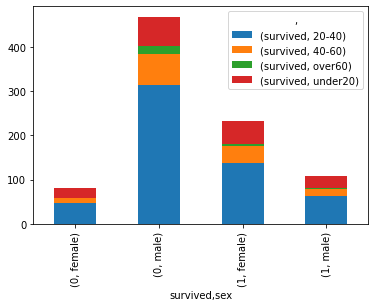

In [138]:
barplot_data.plot(kind='bar', stacked=True)

#### 성별별 생존자, 탑승표 등급별 생존자 분석

In [ ]:
# 탑승표 등급별 생존자/사망자를 시각화해주세요.
# 1. 생존자와 사망자를 탑승표로 분류해서 가공합니다.
# 2. 차트로 만들어주세요.

In [143]:
# x축엔 생존여부(row 내지는 index에 survived가 와야함)
# y축에는 탑승표 종류(column에 pclass가 와야함)
pclassed_data = data.groupby(['pclass', 'survived'])[['survived']].count().copy()

<AxesSubplot:xlabel='survived'>

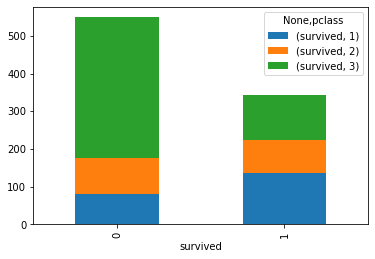

In [146]:
pclassed_data.unstack(0).plot(kind='bar', stacked=True)